In [147]:
import matplotlib.pyplot as plt
import string
import numpy as np
import json

%matplotlib inline

In [148]:
plan_file = "../data/warehouse_plan.png" 

n_storage_rows = 44
n_storage_cols = 15 + 1 # fix bug missing N

x_cols = [270, 304, 313, 350, 360, 396, 405, 440, 452, 488, 497, 533, 544, 581, 589]
y_rows = list(np.linspace(190, 273, 9)) + list(np.linspace(308, 393, 9)) + list(np.linspace(435, 543, 11)) + list(np.linspace(576, 661, 9)) + list(np.linspace(695, 750, 6))
print(len(x_cols), len(y_rows))

15 44


In [149]:
# Build locations
locations = {}
alphabet_string = string.ascii_uppercase[:n_storage_cols]

# fix bug remove N
alphabet_string = alphabet_string.replace("N", "")
print(alphabet_string)

dec1 = 8

for i, col in enumerate(alphabet_string):
    for row in range(n_storage_rows):
        if col <= "D" and row >= 18:
            pass
        elif col <= "E" and row >= 38:
            pass
        else:
            if col >= "E" and col < "J" and row >= 18:
                locations[str(col)+str(row+1)] = [x_cols[i] + dec1, y_rows[row]]
            else:
                locations[str(col)+str(row+1)] = [x_cols[i], y_rows[row]]

locations["start"] = [324, 792]   
locations["end"] = [590, 792]
print(locations)

with open("../data/locations.json", 'w') as outfile:
    json.dump(locations, outfile)

ABCDEFGHIJKLMOP
{'A1': [270, 190.0], 'A2': [270, 200.375], 'A3': [270, 210.75], 'A4': [270, 221.125], 'A5': [270, 231.5], 'A6': [270, 241.875], 'A7': [270, 252.25], 'A8': [270, 262.625], 'A9': [270, 273.0], 'A10': [270, 308.0], 'A11': [270, 318.625], 'A12': [270, 329.25], 'A13': [270, 339.875], 'A14': [270, 350.5], 'A15': [270, 361.125], 'A16': [270, 371.75], 'A17': [270, 382.375], 'A18': [270, 393.0], 'B1': [304, 190.0], 'B2': [304, 200.375], 'B3': [304, 210.75], 'B4': [304, 221.125], 'B5': [304, 231.5], 'B6': [304, 241.875], 'B7': [304, 252.25], 'B8': [304, 262.625], 'B9': [304, 273.0], 'B10': [304, 308.0], 'B11': [304, 318.625], 'B12': [304, 329.25], 'B13': [304, 339.875], 'B14': [304, 350.5], 'B15': [304, 361.125], 'B16': [304, 371.75], 'B17': [304, 382.375], 'B18': [304, 393.0], 'C1': [313, 190.0], 'C2': [313, 200.375], 'C3': [313, 210.75], 'C4': [313, 221.125], 'C5': [313, 231.5], 'C6': [313, 241.875], 'C7': [313, 252.25], 'C8': [313, 262.625], 'C9': [313, 273.0], 'C10': [313, 30

pixel shape: (1169, 826, 4)
scale 1/500
1 pixel = 0.1270316509837468 m


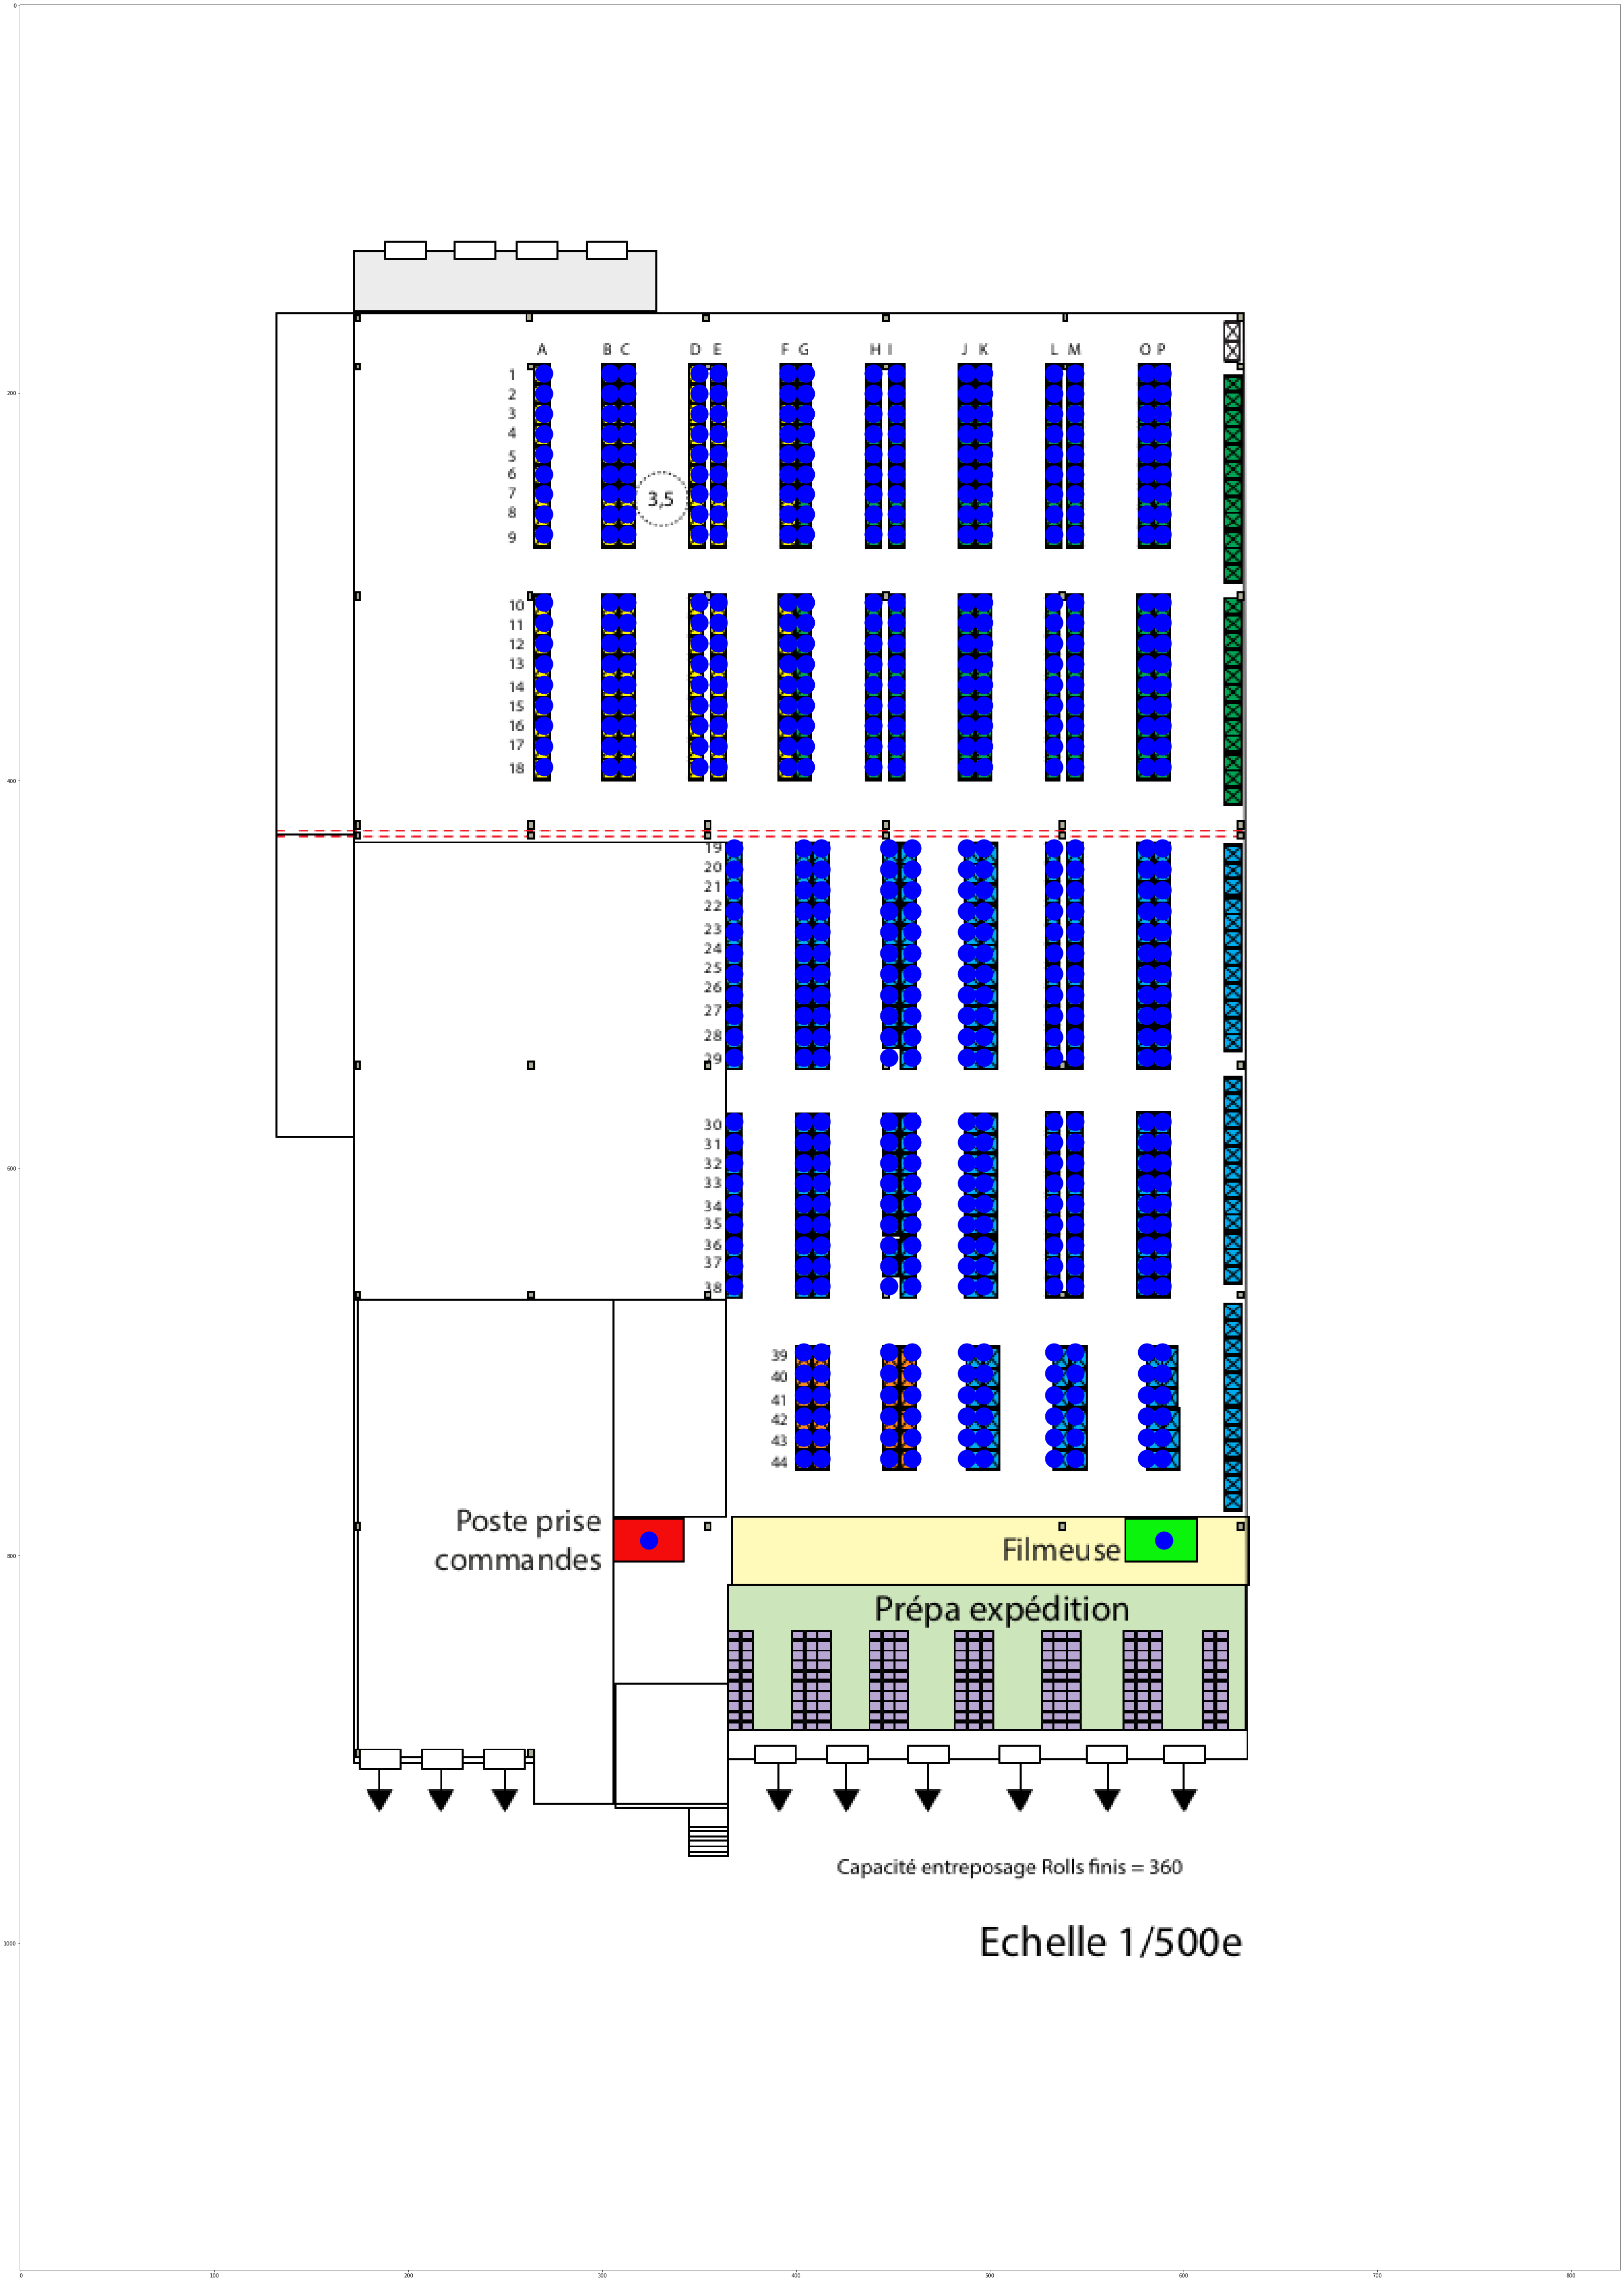

In [150]:
# Read plan
plan = plt.imread(plan_file)
print("pixel shape:", plan.shape)
print("scale 1/500")
print(f"1 pixel = {0.297*500/1169} m")

# Display plan
reduction = 10
plt.figure(figsize=(1169/reduction, 826/reduction))
plt.imshow(plan)

# Locations
for name, (x, y) in locations.items():
    plt.plot(x, y, "bo", markersize=35)
plt.savefig("locations.png", format="png")
plt.show()